## Question 7&8 
### (Some data preprocess of movie_genre.txt is shown in question7_py.ipynb)

In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [ ]:
g<-read.graph("data/movie_graph.txt",format="ncol")

In [ ]:
is_simple(g)

In [ ]:
genreLines <- readLines("data/movieid_genre.txt")

In [ ]:
addGenre = rep("null",vcount(g))

In [ ]:
# taking 40 minutes
# adding genre infomation based on the movie id (not the node index)
for (i in 1:length(genreLines)){
    genreInfo <- strsplit(genreLines[i],"\t")
    movie_id <- genreInfo[[1]][1]
    #print (id)
    node_idx <- which(V(g)$name == movie_id)
    #print (node_idx)
    addGenre[node_idx] <- genreInfo[[1]][2]
}

In [ ]:
V(g)$genre = addGenre

In [ ]:
save(g,file='movie_network.Rdata')
print (vcount(g))

In [2]:
load(file = 'movie_network.Rdata')

In [30]:
vcount(g)

[1] 203574

In [3]:
fc_entire <- cluster_fast_greedy(g)
print ("Fast Greedy Finished with the entire network! (including the nodes without genre infomation)")

[1] "Fast Greedy Finished with the entire network! (including the nodes without genre infomation)"


In [4]:
save(fc_entire,file='fc_entire.Rdata')  
print ("Fast Greedy results write to the file!")

[1] "Fast Greedy results write to the file!"


In [6]:
com_mem <- membership(fc_entire)
print(sprintf("Batman v Superman: Dawn of Justice (2016) membership: %d", com_mem[which(V(g)$name == 12596)]))
print(sprintf("Mission: Impossible - Rogue Nation (2015) membership: %d",com_mem[which(V(g)$name == 100855)]))
print(sprintf("Minions (2015) membership: %d",com_mem[which(V(g)$name == 48390)]))

[1] "Batman v Superman: Dawn of Justice (2016) membership: 1"
[1] "Mission: Impossible - Rogue Nation (2015) membership: 1"
[1] "Minions (2015) membership: 1"


In [7]:
com_size <- sizes(fc_entire)
print (com_size)
com_size[25][1]

Community sizes
    1     2     3     4     5     6     7     8     9    10    11    12    13 
41322 10208  9321 37629 35010  6100  3537  1657  4462  1829  5955   836 12728 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
 5948  2106  7168  9625  2304   619  3505    12   683    14   442    17    18 
   27    28    29    30 
  407    76    22    14 


25 
17

In [10]:
genre_count = function (com_num){
    com = induced_subgraph(g, fc_entire[[com_num]])
    #print (V(com)$genre[1])
    genre_count = rep(0,28)
    genres=c(1:28)
    names(genres)=c("Adventure", "Reality-TV", "Film-Noir","Thriller","Crime","Comedy","Animation","Documentary","Drama",
                    "Western","Romance","Short","Mystery","Sport","Fantasy","Game-Show","Biography","Sci-Fi","Music","War",
                   "Horror","History","Adult","Talk-Show","Action","Musical","Family","News")
    for (i in 1:length(V(com))){
        genre_count[genres[c(V(com)$genre[i])]] = genre_count[genres[c(V(com)$genre[i])]] + 1
    }
    
    return (genre_count)
    }

In [11]:
# calculate the count of each genre
c = array(rep(0,30*28),c(30,28))
for (com_num in 1:30){
    c[com_num, ] = genre_count(com_num)
}

In [13]:
print(c)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]  420    5    1 7582  518 3372  285 1344 7023   503  3117  5948   643
 [2,]  123    2    2 1259  335 1382    6   68 2518    54   986   787   333
 [3,]  105    0    0  269  216  951   25   19 3206    30   858   268    98
 [4,]  491    2    3 2073  773 6432   30  372 8847   708  2546  2179   392
 [5,]  419    0  215 1017  186 2013    0  100 6548  5588  3449 10926   829
 [6,]   35    0    0  669   48  697    4   15 1839   536   495    80   187
 [7,]   10    1    0  121   58  388    0   40  289    21    72    26    34
 [8,]    3    0    0   89   13  165    2   16  644     9   123    89     5
 [9,]   61    0    0  185  136  917    2   43 1517    42   260    47    28
[10,]   15    0    0  156   26  191    2   12  527     5   146    99    23
[11,]   13    0    0  327  160  963   10   45 1606    17   414   624    49
[12,]    4    0    0   82   22   62    0    2  317     1   158     0    10
[13,]   30    1    0 1337

In [25]:
# calculate the frequency of each genre
p = array(rep(0,30*28),c(30,28))
for (com_num in 1:30){
    total_in_community_with_genre = sum(c[com_num, ])
    p[com_num, ] = c[com_num, ]/sum(c[com_num, ])
}

In [26]:
print (p)

             [,1]         [,2]         [,3]        [,4]        [,5]       [,6]
 [1,] 0.010421060 1.240602e-04 2.481205e-05 0.188124953 0.012852641 0.08366623
 [2,] 0.012465795 2.026959e-04 2.026959e-04 0.127597041 0.033951556 0.14006284
 [3,] 0.013174404 0.000000e+00 0.000000e+00 0.033751568 0.027101631 0.11932246
 [4,] 0.016774282 6.832701e-05 1.024905e-04 0.070820949 0.026408391 0.21973967
 [5,] 0.012195832 0.000000e+00 6.258004e-03 0.029601816 0.005413902 0.05859239
 [6,] 0.006017882 0.000000e+00 0.000000e+00 0.115027510 0.008253095 0.11984182
 [7,] 0.002901073 2.901073e-04 0.000000e+00 0.035102988 0.016826226 0.11256165
 [8,] 0.001949318 0.000000e+00 0.000000e+00 0.057829760 0.008447044 0.10721248
 [9,] 0.015613002 0.000000e+00 0.000000e+00 0.047350909 0.034809317 0.23470694
[10,] 0.009829620 0.000000e+00 0.000000e+00 0.102228047 0.017038008 0.12516383
[11,] 0.002531646 0.000000e+00 0.000000e+00 0.063680623 0.031158715 0.18753651
[12,] 0.005102041 0.000000e+00 0.000000e+00 0.104591

In [19]:
sum(p[1,])

[1] 1

### Plot the distribution of picked 10 communities 

In [21]:
genres=c(1:28)
names(genres)=c("Adventure", "Reality-TV", "Film-Noir","Thriller","Crime","Comedy","Animation","Documentary","Drama",
                "Western","Romance","Short","Mystery","Sport","Fantasy","Game-Show","Biography","Sci-Fi","Music","War",
               "Horror","History","Adult","Talk-Show","Action","Musical","Family","News")

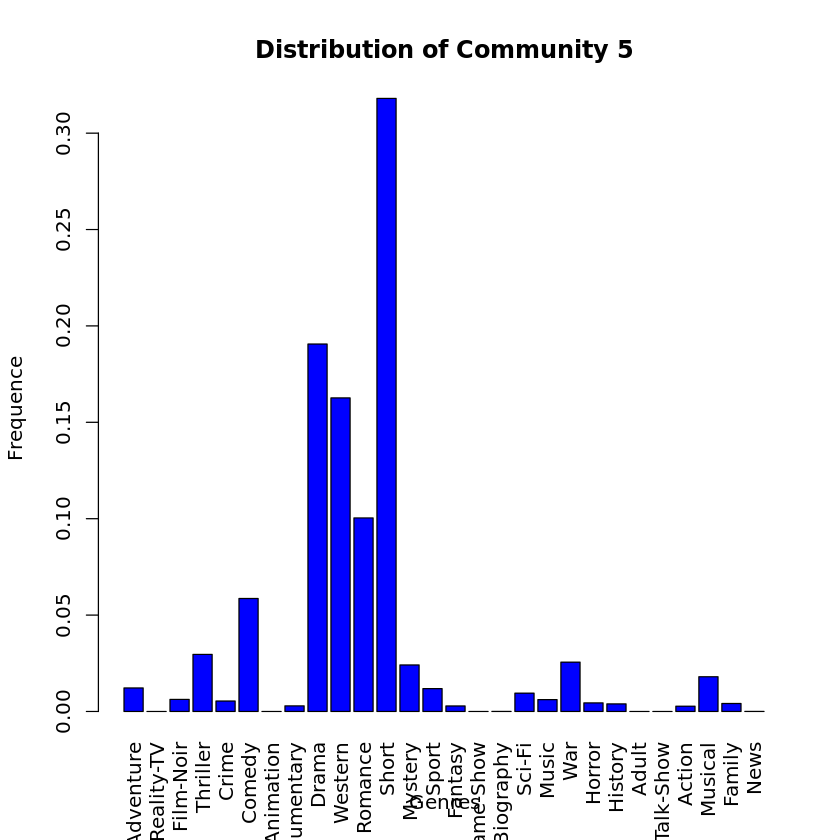

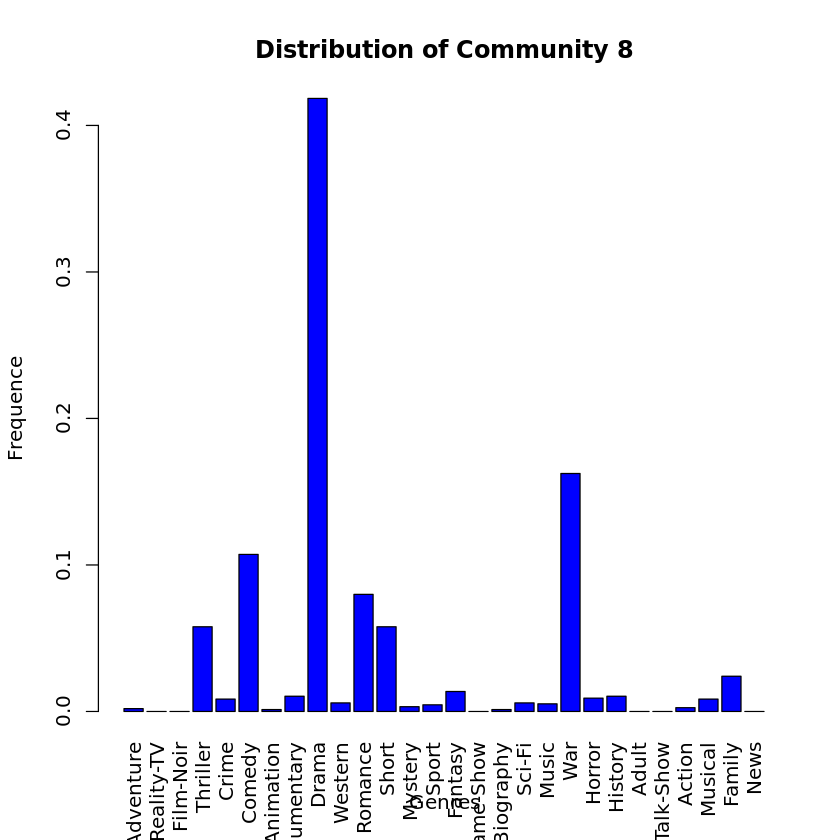

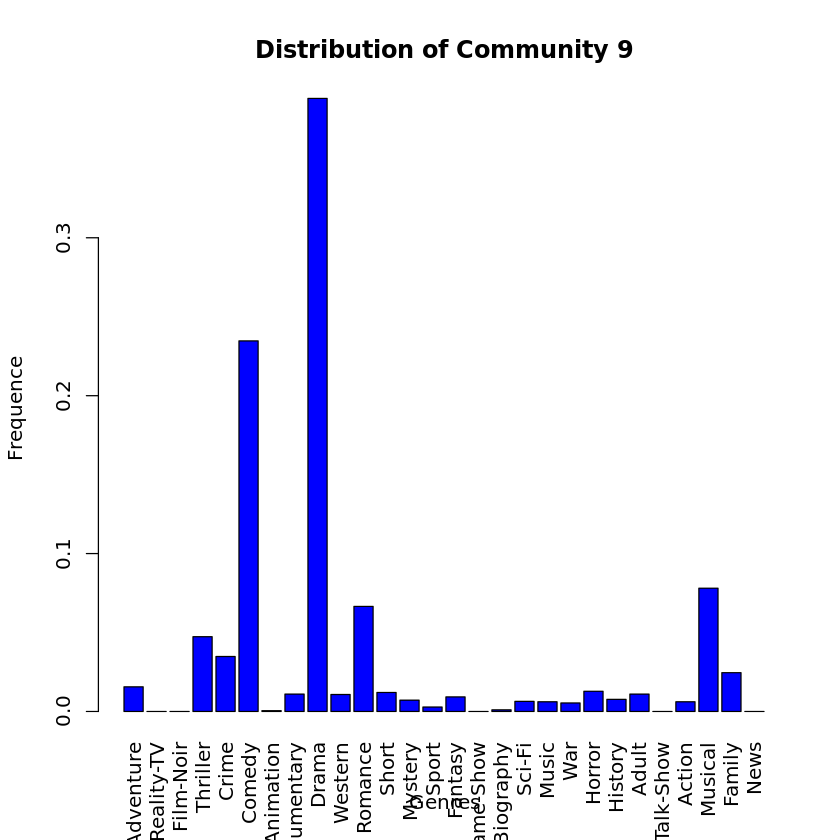

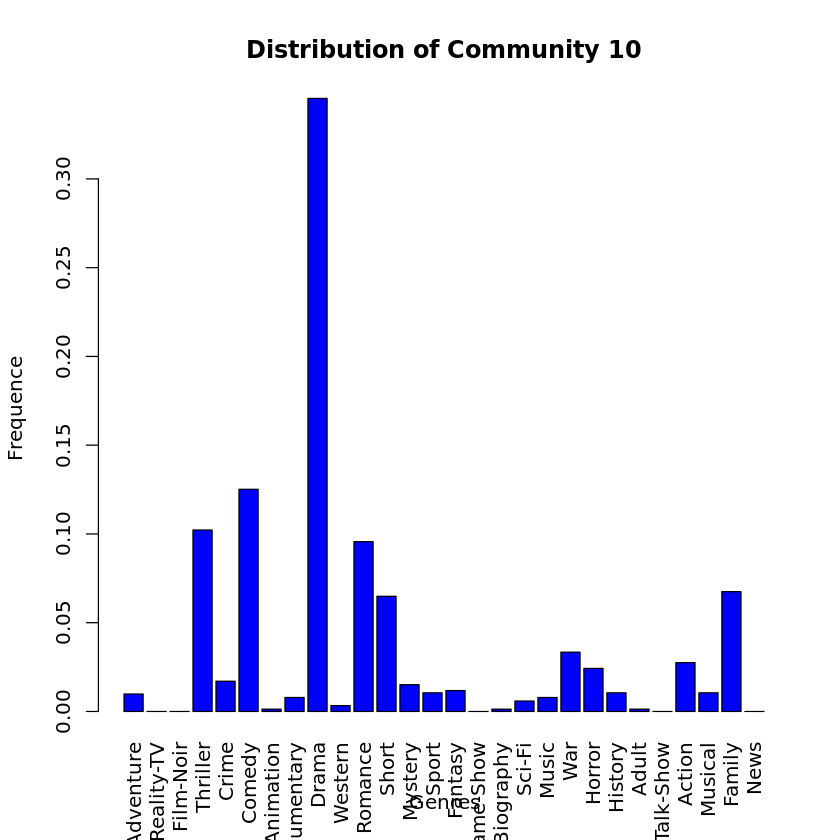

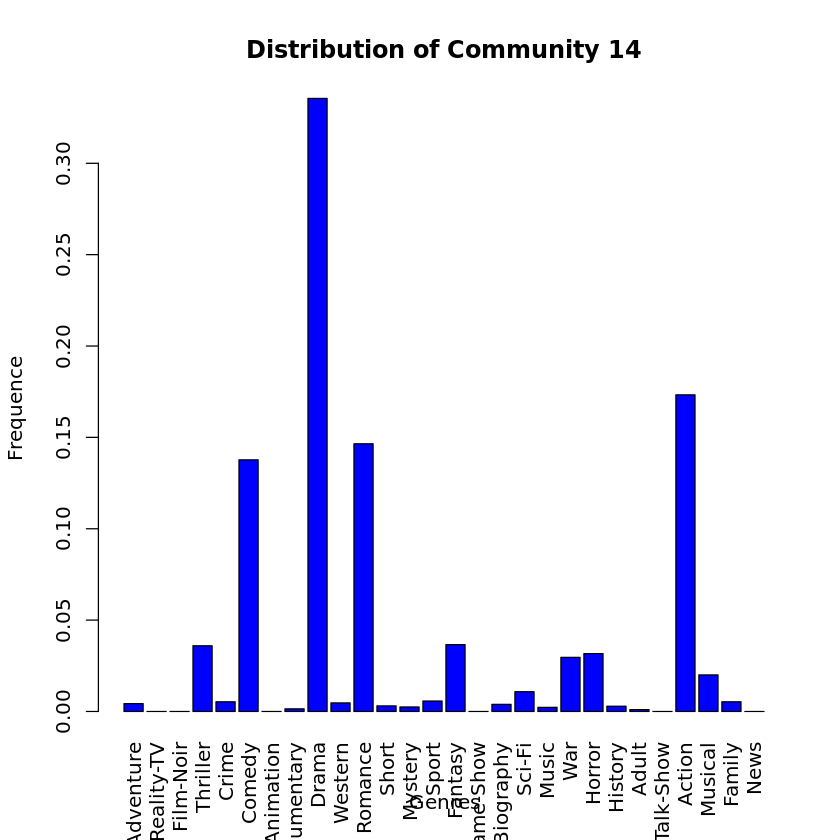

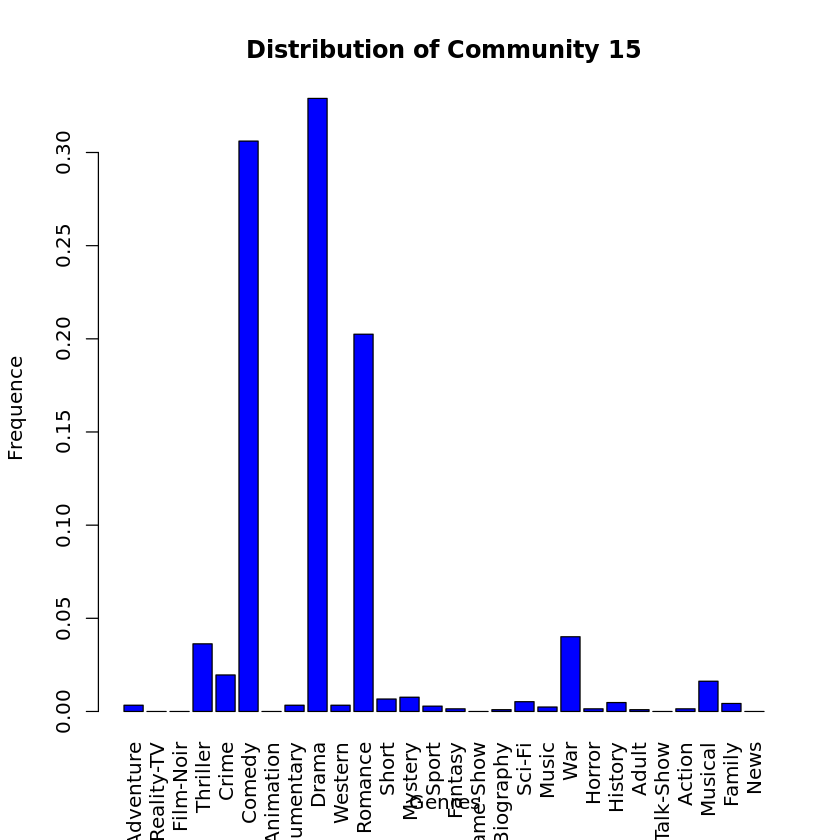

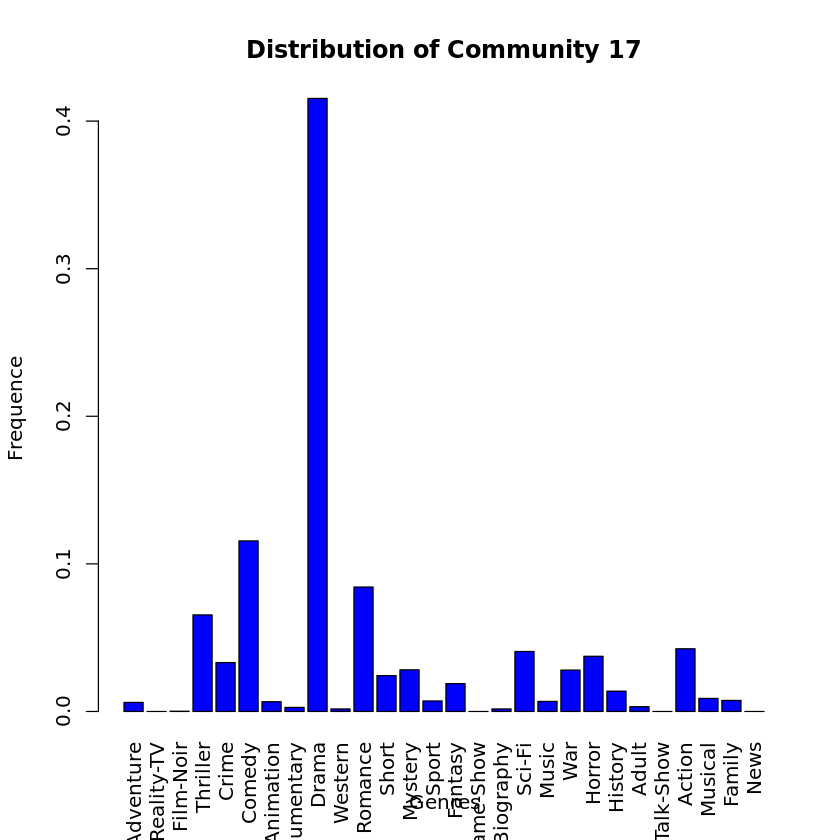

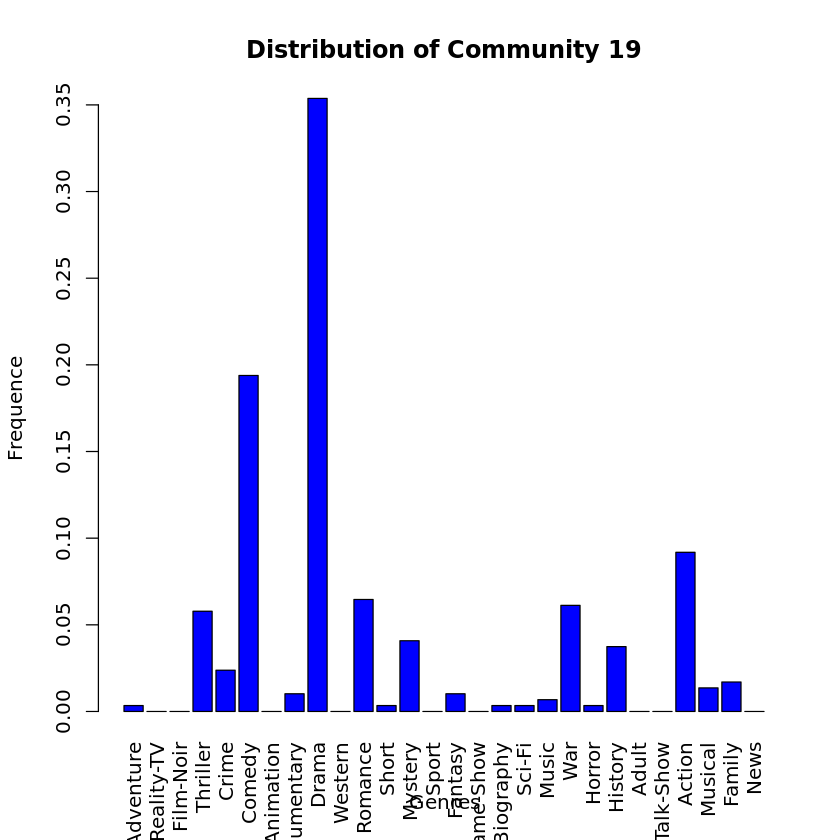

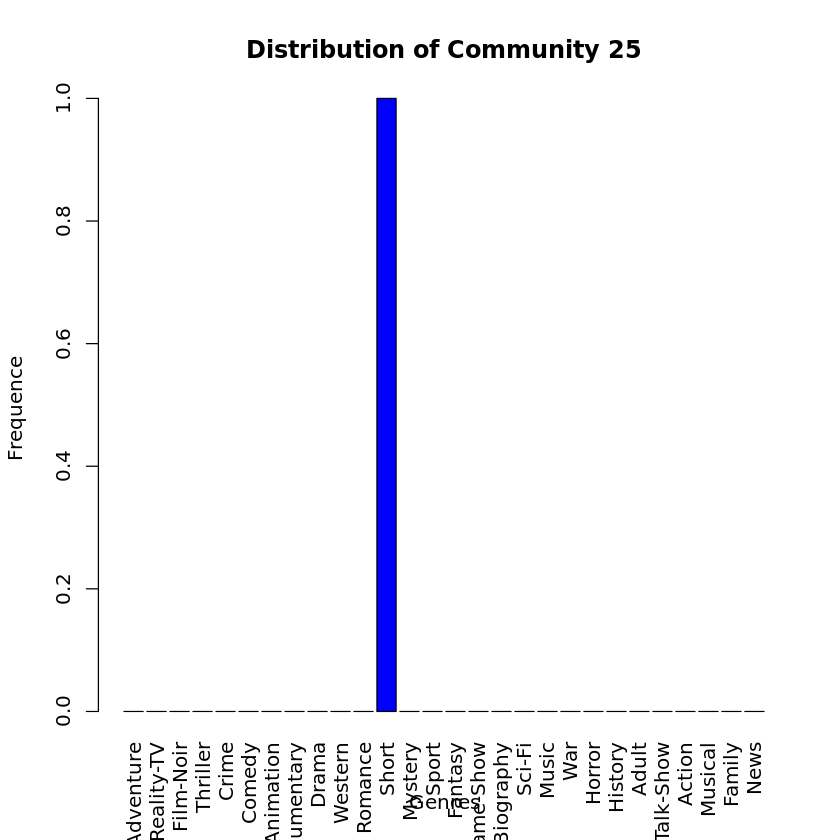

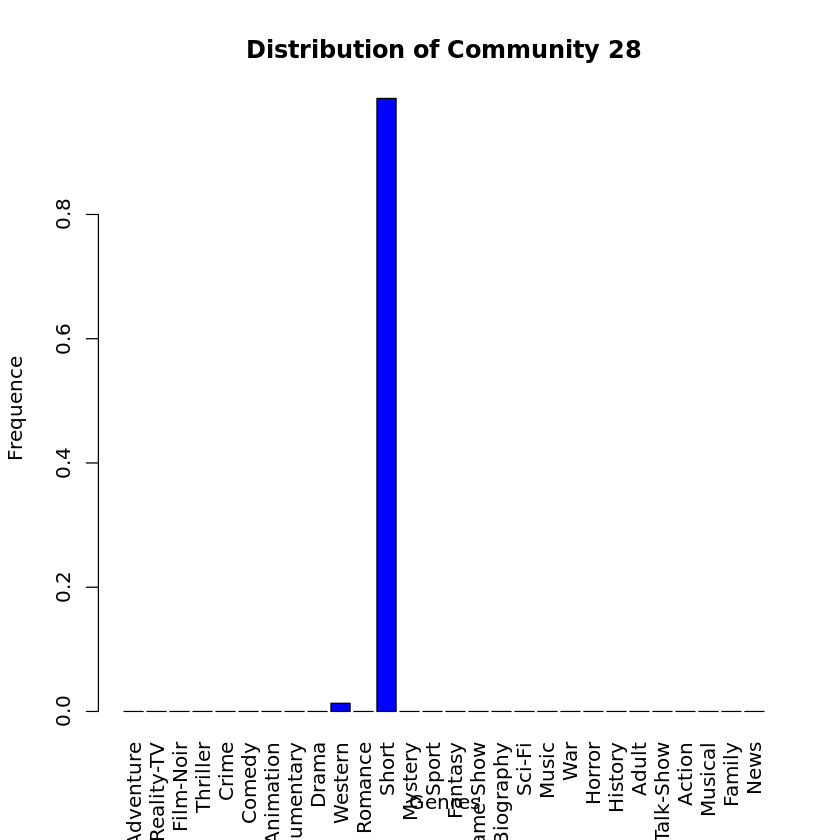

In [28]:
picked_com = c(5,8,9,10,14,15,17,19,25,28)
for (com_num in picked_com){
    plotName = paste0("Distribution of Community ", com_num)
    plt<-barplot(p[com_num, ], main = plotName, xlab = "Genres", ylab = "Frequence", col = "blue",
            names.arg = names(genres), las = 3)
}

### Determine most dominant genre based simply on frequency counts. 

In [31]:
for (com_num in 1:30){
    max_genre_freq = max(p[com_num, ])
    max_genre = which(p[com_num, ] == max_genre_freq)
    cat("The most Dominant Genre in Community ", com_num, " is ", names(genres)[max_genre], ",with frequency",max_genre_freq,"\n")
}

The most Dominant Genre in Community  1  is  Thriller ,with frequency 0.188125 
The most Dominant Genre in Community  2  is  Drama ,with frequency 0.2551941 
The most Dominant Genre in Community  3  is  Drama ,with frequency 0.4022585 
The most Dominant Genre in Community  4  is  Drama ,with frequency 0.3022445 
The most Dominant Genre in Community  5  is  Short ,with frequency 0.3180231 
The most Dominant Genre in Community  6  is  Drama ,with frequency 0.3161967 
The most Dominant Genre in Community  7  is  Adult ,with frequency 0.6228605 
The most Dominant Genre in Community  8  is  Drama ,with frequency 0.4184535 
The most Dominant Genre in Community  9  is  Drama ,with frequency 0.3882775 
The most Dominant Genre in Community  10  is  Drama ,with frequency 0.3453473 
The most Dominant Genre in Community  11  is  Drama ,with frequency 0.3127556 
The most Dominant Genre in Community  12  is  Drama ,with frequency 0.4043367 
The most Dominant Genre in Community  13  is  Drama ,with f

### The most frequent dominant ones across communities 

In [32]:
q = rep(0,28)
movie_total = sum(c)
for (i in 1:28){
    q[i] = sum(c[,i]) 
}
q = q/movie_total

In [33]:
max_q = max(q)
max_genre = which(q == max_q)
cat("The most Dominant Genre in across communities is ", names(genres)[max_genre], ",with frequency",max_q,"\n")

The most Dominant Genre in across communities is  Drama ,with frequency 0.2584951 


### Determine the most dominant genre in each communitiy based on the modified scores 

In [34]:
score = array(rep(0,30*28),c(30,28))

In [35]:
for (j in 1:30){ # jth community
    for (i in 1:28){ # ith genre
        if (c[j,i] == 0)
            score[j,i] = 0
        else
            score[j,i] = log(c[j,i])*p[j,i]/q[i]
    }
}

In [36]:
print (score)

            [,1]      [,2]        [,3]       [,4]       [,5]       [,6]
 [1,]  4.4990333 3.2499295  0.00000000 18.2754321  4.4486143  5.5627857
 [2,]  4.2876002 2.2868486  0.11331232  9.9042051 10.9319723  8.2899178
 [3,]  4.3823363 0.0000000  0.00000000  2.0533817  8.0677134  6.6973133
 [4,]  7.4291395 0.7708768  0.09081027  5.8812342  9.7260359 15.7714737
 [5,]  5.2631687 0.0000000 27.10619422  2.2290092  1.5667971  3.6482793
 [6,]  1.5292476 0.0000000  0.00000000  8.1376574  1.7693617  6.4216731
 [7,]  0.4774484 0.0000000  0.00000000  1.8306374  3.7836782  5.4918879
 [8,]  0.1530661 0.0000000  0.00000000  2.8226943  1.1998794  4.4805694
 [9,]  4.5874634 0.0000000  0.00000000  2.6879826  9.4703454 13.1036573
[10,]  1.9025912 0.0000000  0.00000000  5.6136728  3.0742334  5.3806888
[11,]  0.4641237 0.0000000  0.00000000  4.0094141  8.7575883 10.5452690
[12,]  0.5055352 0.0000000  0.00000000  5.0120017  4.8035869  2.6713817
[13,]  0.7596065 0.0000000  0.00000000 10.9002358  2.8513450  3.

In [37]:
for (j in 1:30){
    max_score = max(score[j, ])
    max_genre = which(score[j, ] == max_score)
    #if (j == 30)
    #    cat ("Not Applicable in this community!\n")
    #else
    cat("Most Dominant Genre in Community ", j, " is ", names(genres)[max_genre], ",with score",max_score,"\n")
}

Most Dominant Genre in Community  1  is  Documentary ,with score 19.92081 
Most Dominant Genre in Community  2  is  Mystery ,with score 11.36893 
Most Dominant Genre in Community  3  is  History ,with score 21.36379 
Most Dominant Genre in Community  4  is  Comedy ,with score 15.77147 
Most Dominant Genre in Community  5  is  Western ,with score 32.92769 
Most Dominant Genre in Community  6  is  Musical ,with score 14.01139 
Most Dominant Genre in Community  7  is  Adult ,with score 313.7359 
Most Dominant Genre in Community  8  is  War ,with score 32.03446 
Most Dominant Genre in Community  9  is  Musical ,with score 22.22157 
Most Dominant Genre in Community  10  is  Family ,with score 15.78196 
Most Dominant Genre in Community  11  is  Family ,with score 27.84902 
Most Dominant Genre in Community  12  is  Romance ,with score 9.678031 
Most Dominant Genre in Community  13  is  Family ,with score 26.77092 
Most Dominant Genre in Community  14  is  Action ,with score 49.3252 
Most Domi

### Preparation for the data to bipartite graph  (Bipartite graph is generated in question8c_py.ipynb)

In [40]:
# using the community 23, size = 14
save_community_el = function(i){
    Community = induced_subgraph(g, fc_entire[[i]])
    V(Community)$name <- as.numeric(fc_entire[[i]])      ## To preserve original node numbers
    EL = as_edgelist(Community)
    FileName = paste0("./Community_data/Community", i, "_edgelist.dat")
    write.table(EL, FileName, row.names=FALSE, col.names=FALSE, sep="\t")
}

save_community_el(23)

In [42]:
com23 = induced_subgraph(g, fc_entire[[23]])
V(com23)

+ 14/14 vertices, named, from 17d5b9a:
 [1] 139084 139078 139086 139079 139074 139810 139075 48206  139083 139080
[11] 139811 139081 229416 139085